In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join

data_path = './data/train'
inter_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
genre_df = pd.read_csv(join(data_path, 'genres.tsv'), sep='\t')
title_df = pd.read_csv(join(data_path, 'titles.tsv'), sep='\t')
director_df = pd.read_csv(join(data_path, 'directors.tsv'), sep='\t')
writer_df = pd.read_csv(join(data_path, 'writers.tsv'), sep='\t')
year_df = pd.read_csv(join(data_path, 'years.tsv'), sep='\t')

### interactions

In [4]:
num_train_users = inter_df['user'].nunique()
num_train_items = inter_df['item'].nunique()
print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [5]:
print("Data sparsity ratio: ", 1 - len(inter_df) / (num_train_users * num_train_items))

Data sparsity ratio:  0.9758536052697853


### genres

In [6]:
genre_df.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [7]:
num_train_users = genre_df['item'].nunique()
num_train_items = genre_df['genre'].nunique()
print ("Number of unique train items: ", num_train_users)
print ("Number of unique train genres: ", num_train_items)

Number of unique train items:  6807
Number of unique train genres:  18


### titles

In [8]:
title_df.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [9]:
num_train_users = title_df['item'].nunique()
num_train_items = title_df['title'].nunique()
print ("Number of unique train items: ", num_train_users)
print ("Number of unique train titles: ", num_train_items)

Number of unique train items:  6807
Number of unique train titles:  6806


In [10]:
title_df[title_df.duplicated(subset=['title'], keep=False)]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


In [ ]:
# 같은 것으로 취급함.
# 전체 데이터셋 item id 64997 -> 34048로 변경.

In [14]:
# drop the specified row
dropping_row = title_df['item'] == 64997
title_df.drop(labels=title_df[dropping_row].index, axis=0, inplace=True)

In [ ]:
# title, genre, writer, director, year, interaction

In [38]:
spe = genre_df['item'].isin([64997, 34048])
genre_df[spe]

,item,genre
1001,34048,Action
1002,34048,Adventure
1003,34048,Sci-Fi
1004,34048,Thriller
4735,64997,Action
4736,64997,Sci-Fi


In [40]:
spe = writer_df['item'].isin([64997, 34048])
writer_df[spe]

,item,writer
4527,34048,nm0295264
6221,34048,nm0462895
10154,34048,nm0920229
10158,64997,nm0920229


In [41]:
spe = director_df['item'].isin([64997, 34048])
director_df[spe]

,item,director
384,34048,nm0000229


In [42]:
spe = year_df['item'].isin([64997, 34048])
year_df[spe]

,item,year
4751,34048,2005
4806,64997,2005


In [2]:
spe = inter_df['item'].isin([64997, 34048])
inter_df[spe]

,user,item,time
126,11,34048,1230788489
349,11,64997,1251170446
5630,208,34048,1157583328
7675,258,34048,1221520795
11320,367,34048,1120865002
...,...,...,...
5150174,138404,34048,1138010617
5150984,138414,34048,1386706180
5152924,138456,34048,1183783639
5153574,138472,34048,1194041076


In [3]:
inter_df[spe][inter_df[spe].item==34048]

,user,item,time
126,11,34048,1230788489
5630,208,34048,1157583328
7675,258,34048,1221520795
11320,367,34048,1120865002
12619,388,34048,1174643516
...,...,...,...
5150174,138404,34048,1138010617
5150984,138414,34048,1386706180
5152924,138456,34048,1183783639
5153574,138472,34048,1194041076


In [4]:
inter_df[spe][inter_df[spe].item==64997]

,user,item,time
349,11,64997,1251170446
20178,572,64997,1324349773
77255,2024,64997,1279975284
78909,2070,64997,1278507920
200538,5063,64997,1246485085
...,...,...,...
5050497,135595,64997,1349628975
5054742,135751,64997,1230682485
5078282,136479,64997,1284129294
5093852,136875,64997,1311805494


### directors

In [33]:
director_df.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [35]:
num_train_users = director_df['item'].nunique()
num_train_items = director_df['director'].nunique()
print ("Number of unique train items: ", num_train_users)
print ("Number of unique train directors: ", num_train_items)

Number of unique train items:  5503
Number of unique train directors:  1340


### writers

In [36]:
writer_df.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [38]:
num_train_users = writer_df['item'].nunique()
num_train_items = writer_df['writer'].nunique()
print ("Number of unique train items: ", num_train_users)
print ("Number of unique train writers: ", num_train_items)

Number of unique train items:  5648
Number of unique train writers:  2989


### years

In [39]:
year_df.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [40]:
num_train_users = year_df['item'].nunique()
num_train_items = year_df['year'].nunique()
print ("Number of unique train items: ", num_train_users)
print ("Number of unique train years: ", num_train_items)

Number of unique train items:  6799
Number of unique train years:  93


### 분석

In [58]:
# 유저 별 영화 소비 패턴

In [59]:
# user - item

In [69]:
a = inter_df.groupby('user')['item']

<AxesSubplot: >

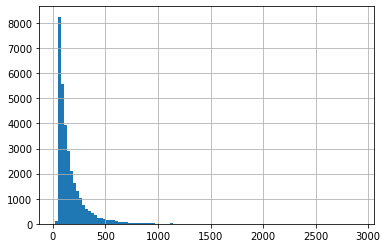

In [80]:
inter_df['user'].value_counts().hist(bins=100)

In [81]:
inter_df['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

In [82]:
inter_df['user'].value_counts().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: user, dtype: float64

In [89]:
inter_df['user'].value_counts()[:100]

/tmp/ipykernel_67735/2614317664.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inter_df['user'].value_counts()[:100]


8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
118848    1049
14705     1048
32671     1046
126072    1045
35834     1039
Name: user, Length: 100, dtype: int64

In [99]:
inter_df['user'].value_counts()[-20000:]

/tmp/ipykernel_67735/3365103908.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inter_df['user'].value_counts()[-20000:]


133076    152
11005     152
132047    152
2310      152
132706    152
         ... 
11211      32
128756     28
105578     22
68606      19
53188      16
Name: user, Length: 20000, dtype: int64

### Modify dfs & Save it

#### - 이상치 (war of the worlds) 제거

In [ ]:
# 같은 것으로 취급함.
# 전체 데이터셋 item id 64997 -> 34048로 변경.

In [45]:
path = '/opt/ml/input/data/tr_v1_dup_title/'

In [38]:
spe = genre_df['item'].isin([64997, 34048])
genre_df[spe]

,item,genre
1001,34048,Action
1002,34048,Adventure
1003,34048,Sci-Fi
1004,34048,Thriller
4735,64997,Action
4736,64997,Sci-Fi


In [40]:
spe = writer_df['item'].isin([64997, 34048])
writer_df[spe]

,item,writer
4527,34048,nm0295264
6221,34048,nm0462895
10154,34048,nm0920229
10158,64997,nm0920229


In [41]:
spe = director_df['item'].isin([64997, 34048])
director_df[spe]

,item,director
384,34048,nm0000229


In [42]:
spe = year_df['item'].isin([64997, 34048])
year_df[spe]

,item,year
4751,34048,2005
4806,64997,2005


In [54]:
spe = title_df['item'].isin([64997, 34048])
title_df[spe]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


In [43]:
spe = inter_df['item'].isin([64997, 34048])
inter_df[spe]

,user,item,time
126,11,34048,1230788489
349,11,64997,1251170446
5630,208,34048,1157583328
7675,258,34048,1221520795
11320,367,34048,1120865002
...,...,...,...
5150174,138404,34048,1138010617
5150984,138414,34048,1386706180
5152924,138456,34048,1183783639
5153574,138472,34048,1194041076


In [57]:
# drop rows & save to path
dfs = [genre_df, writer_df, director_df, year_df, title_df, inter_df]
names = ['genres', 'writers', 'directors', 'years', 'titles', 'interactions']
for name, df in zip(names, dfs):
    print(f"==================={name}====================")
    print("before - ", df.shape)
    df = df.drop(index=df[df['item'] == 64997].index, inplace=False)
    df.to_csv(path + name + '.csv', index=False)
    print("after - ", df.shape)
    print("=============================================\n")

===================genres====================
before -  (15933, 2)
after -  (15931, 2)

===================writers====================
before -  (11306, 2)
after -  (11305, 2)

===================directors====================
before -  (5905, 2)
after -  (5905, 2)

===================years====================
before -  (6799, 2)
after -  (6798, 2)

===================titles====================
before -  (6807, 2)
after -  (6806, 2)

===================interactions====================
before -  (5154471, 3)
after -  (5154293, 3)



#### - 결측치 제거
    1. genre -> x              2. year -> 8개(완료)
    3. title -> x              4. director -> 1303개(불가)
    5. writer -> 1159개(불가)    5. interaction -> 비교 기준

In [6]:
# modified version
data_path   = './data/tr_v1_dup_title'
base        = 'v1_base'
inter_df    = pd.read_csv(os.path.join(data_path, 'interactions.csv')) # 전체 학습 데이터
genre_df    = pd.read_csv(join(data_path, 'genres.csv'))
title_df    = pd.read_csv(join(data_path, 'titles.csv'))
director_df = pd.read_csv(join(data_path, 'directors.csv'))
writer_df   = pd.read_csv(join(data_path, 'writers.csv'))
year_df     = pd.read_csv(join(data_path, 'years.csv'))

In [10]:
# 1. explicit null
dfs = [genre_df, year_df, title_df, director_df, writer_df, inter_df]
names = ['genres', 'years', 'titles', 'directors', 'writers', 'interactions']

for df, name in zip(dfs, names):
    if df.isnull().sum().sum() != 0:
        print(name)

# 2. item.nunique() != 6806
for df, name in zip(dfs, names):
    uniq_items = df['item'].nunique()
    diff = 6806-uniq_items
    if uniq_items != 6806:
        print(f"{name} 전체 데이터: {uniq_items} 결측치: {diff}")

years 전체 데이터: 6798 결측치: 8
directors 전체 데이터: 5503 결측치: 1303
writers 전체 데이터: 5647 결측치: 1159


##### 결측치 채우기 (year) -> output: year_df

In [129]:
# 1. year_df에서 year 데이터가 없는 item list 뽑기
ilist = list( set(inter_df.item.unique()) - set(year_df.item.unique()) )
print(ilist)

# 2. title_df에서 item list에 해당하는 item의 year 가져오기
ylist = []
for item in ilist:
    row = title_df[title_df['item'] == item]
    y = int(row.title.item()[-6:].strip('()'))
    ylist.append(y)

# 3. year_df에 populate
data = list(zip(ilist, ylist))
new_df = pd.DataFrame(data, columns=['item', 'year'])
year_df = year_df.append(new_df, ignore_index=True)


[32898, 119145, 6987, 6988, 7243, 3310, 7065, 8511]


/tmp/ipykernel_18734/896255664.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_df = year_df.append(new_df, ignore_index=True)


In [147]:
import os
path = '/opt/ml/input/data/tr_v2_miss_year/'
dfs = [genre_df, year_df, title_df, director_df, writer_df, inter_df]
names = ['genres', 'years', 'titles', 'directors', 'writers', 'interactions']

if not os.path.exists(path): os.mkdir(path)

for df, name in zip(dfs, names):
    df.to_csv(path + name + '.csv', index=False)